In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 读取数据
baseball = pd.read_csv("baseball.csv")

# 查看数据结构
print(baseball.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB
None


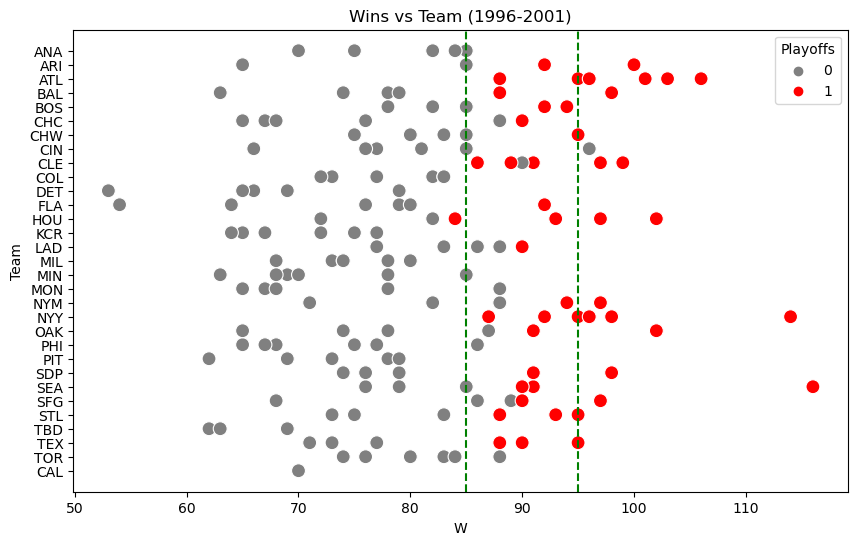

In [5]:
# 子集数据：1996-2001
moneyball_1996_2001 = baseball[(baseball['Year'] < 2002) & (baseball['Year'] >= 1996)]

# 绘制第一个图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=moneyball_1996_2001, x='W', y='Team', hue='Playoffs', palette={0: 'grey', 1: 'red'}, s=100)
plt.axvline(x=85, color='green', linestyle='--')
plt.axvline(x=95, color='green', linestyle='--')
plt.title('Wins vs Team (1996-2001)')
plt.show()


C:\Users\asas9\AppData\Local\Temp\ipykernel_10056\3822929675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moneyball['RD'] = moneyball['RS'] - moneyball['RA']


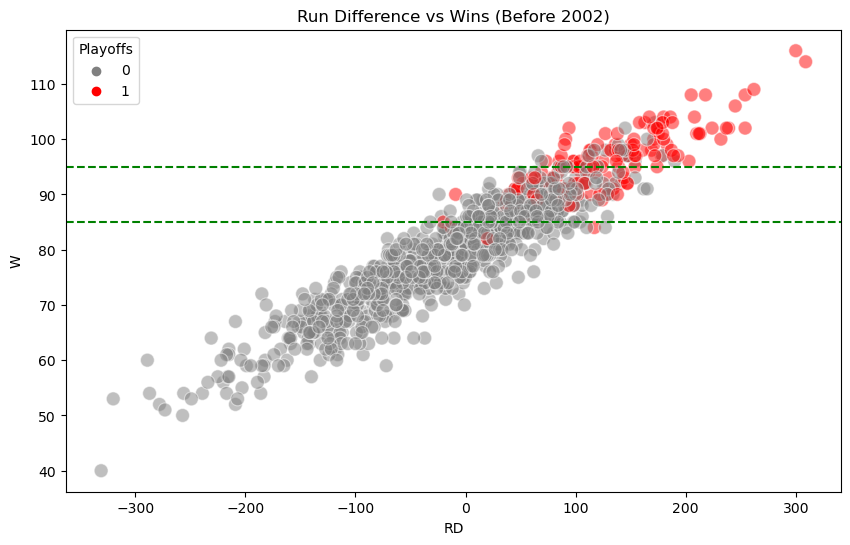

In [6]:
# 子集数据：2002年之前
moneyball = baseball[baseball['Year'] < 2002]

# 创建新列 RD（Run Difference）
moneyball['RD'] = moneyball['RS'] - moneyball['RA']

# 绘制第二个图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=moneyball, x='RD', y='W', hue='Playoffs', palette={0: 'grey', 1: 'red'}, alpha=0.5, s=100)
plt.axhline(y=85, color='green', linestyle='--')
plt.axhline(y=95, color='green', linestyle='--')
plt.title('Run Difference vs Wins (Before 2002)')
plt.show()


In [8]:
# 执行线性回归：Wins ~ RD
Wins_Reg = ols('W ~ RD', data=moneyball).fit()
print(Wins_Reg.summary())

# 执行线性回归：RS ~ OBP + SLG + BA
RS_reg_1 = ols('RS ~ OBP + SLG + BA', data=moneyball).fit()
print(RS_reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:20:29   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.8814      0.131    616.675      0.0